In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv ('credit_card.csv')
credit.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [6]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [7]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

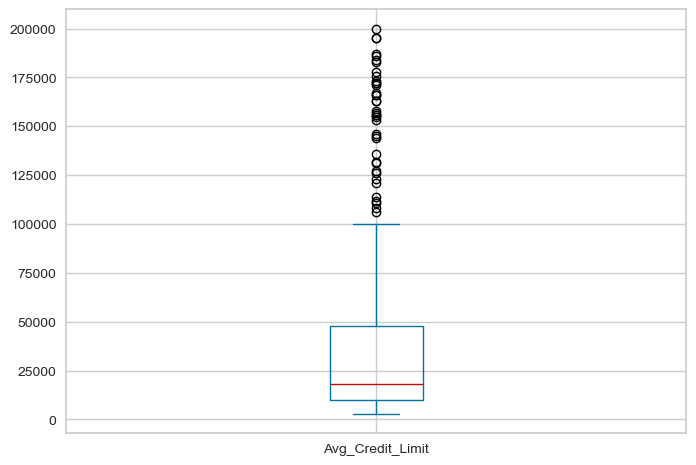

In [8]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outliner 660
Jumlah data sesudah dibuang outliner 621


<Axes: >

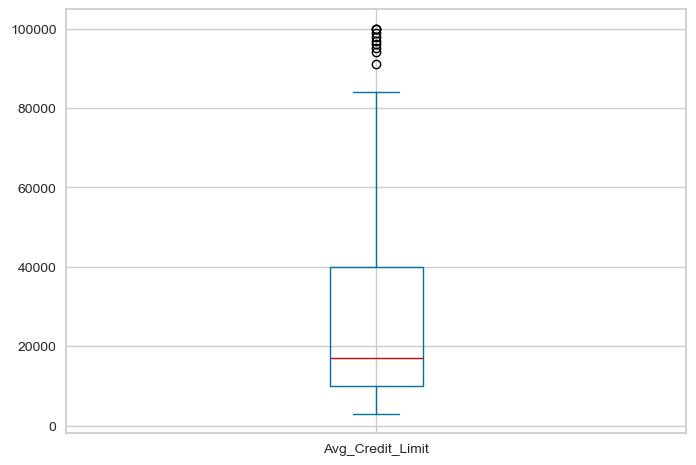

In [9]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_credit, kolom_outlier):
    if is_numeric_dtype(df_credit[kolom_outlier]):
        q1 = df_credit[kolom_outlier].quantile(0.25)
        q3 = df_credit[kolom_outlier].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)

        df_out = df_credit.loc[(df_credit[kolom_outlier] >= batas_bawah) & (df_credit[kolom_outlier] <= batas_atas)]
    return df_out

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outliner", df_credit.shape[0])
print("Jumlah data sesudah dibuang outliner", data_bersih.shape[0])
data_bersih['Avg_Credit_Limit'].plot(kind='box')

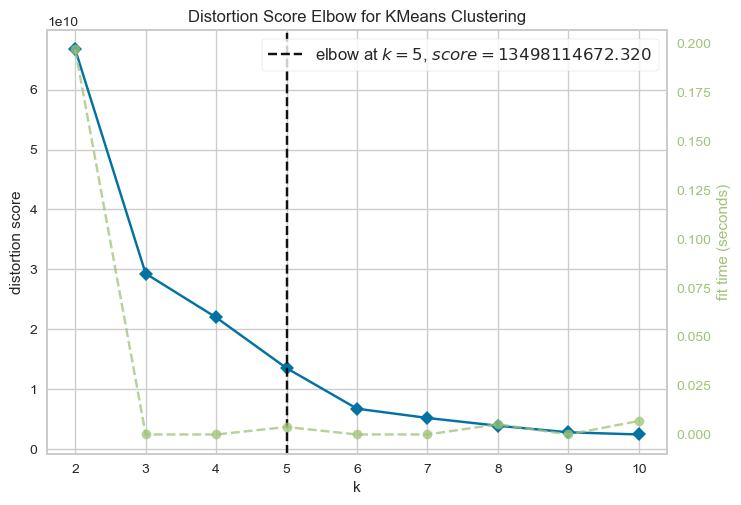

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans(random_state=44)
vis = KElbowVisualizer(KMeansC, k=(2,11))

vis.fit(data_bersih)
vis.show() 

silhouette score k-means for  2  clusters : 0.7275517813087928
silhouette score k-means for  3  clusters : 0.7058100919802311
silhouette score k-means for  4  clusters : 0.5928895843252326
silhouette score k-means for  5  clusters : 0.6072469306603215
silhouette score k-means for  6  clusters : 0.6277644646724014
silhouette score k-means for  7  clusters : 0.6204746288626433
silhouette score k-means for  8  clusters : 0.6275593653509658
silhouette score k-means for  9  clusters : 0.6076626138462472
silhouette score k-means for  10  clusters : 0.5965321486637107


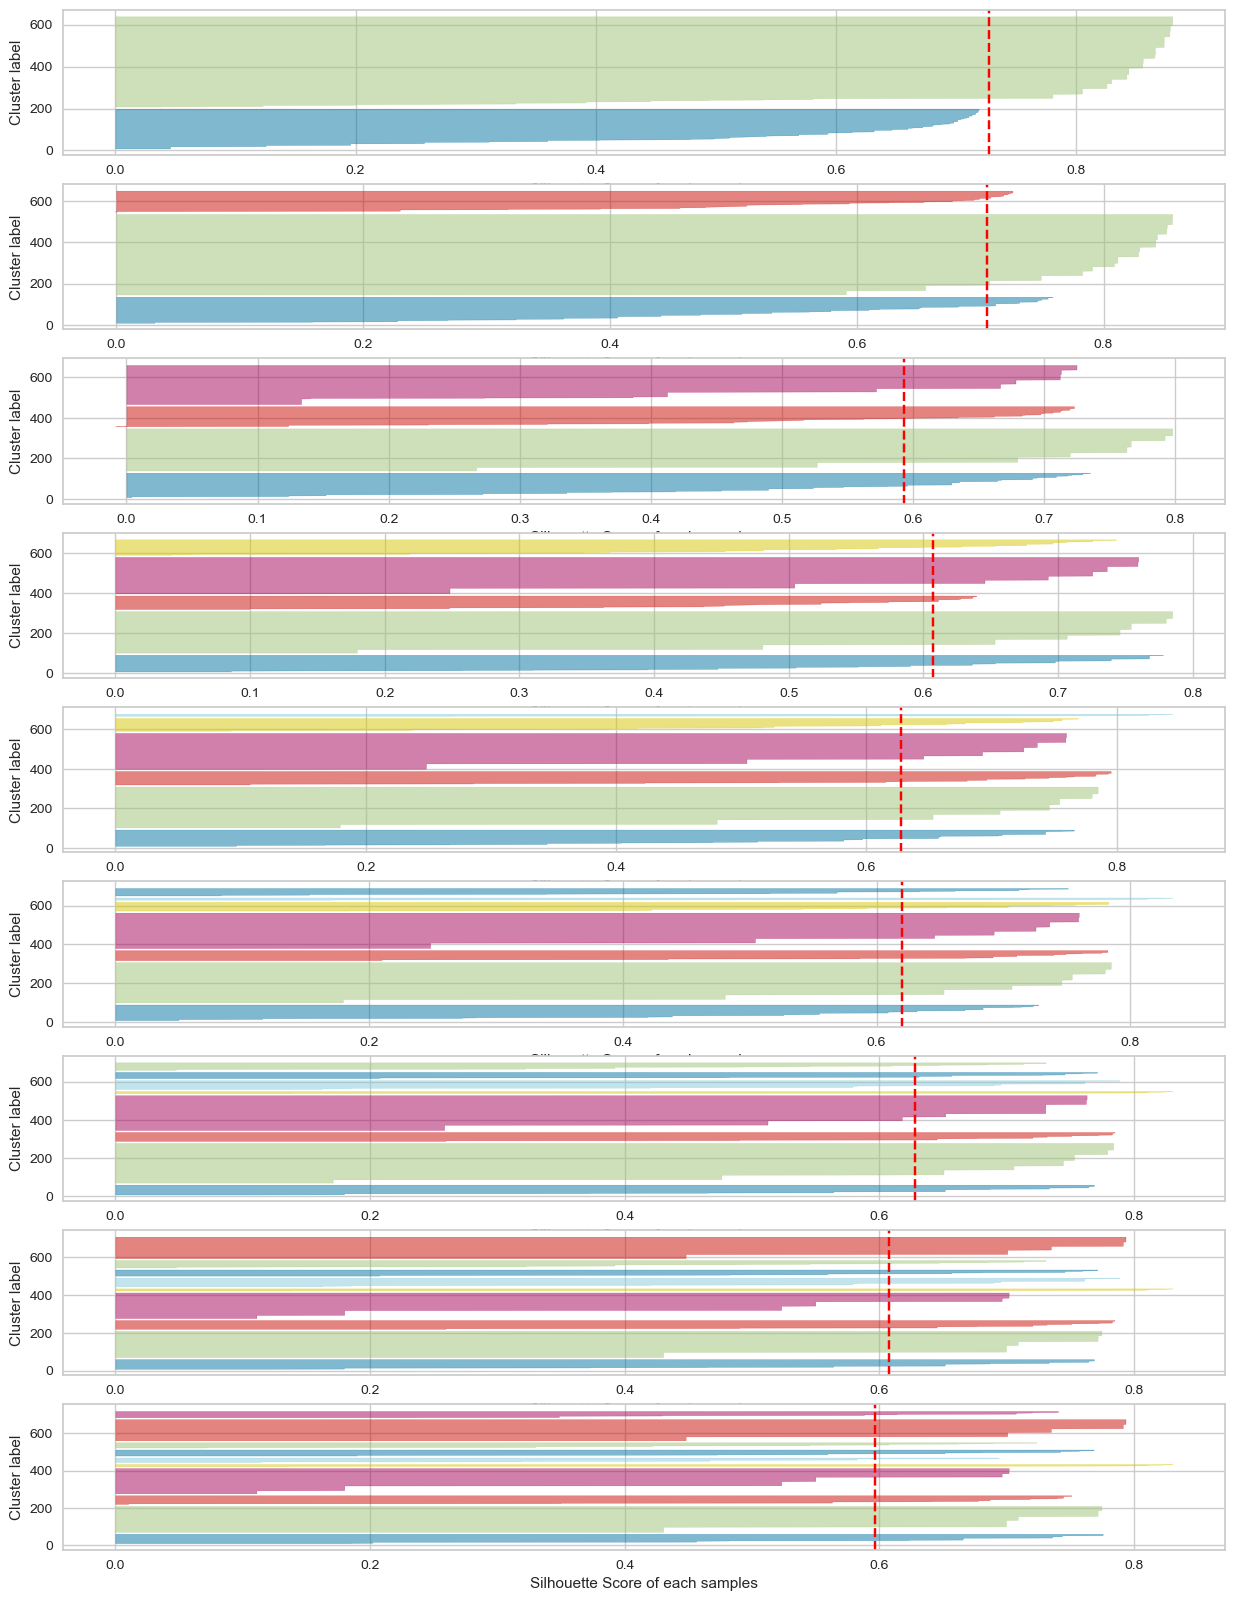

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=44)
    KM_clusters = kMeansC.fit_predict(data_bersih)
    print("silhouette score k-means for ", k, " clusters :", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel = "Cluster label")

In [12]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

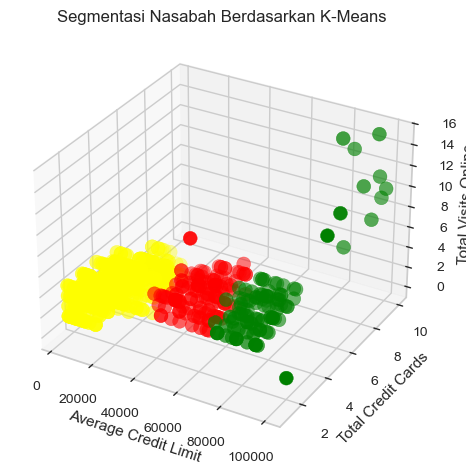

Silhoutee Score K-Means: 0.706


In [14]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=44)
K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], 
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah Berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhoutee Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))



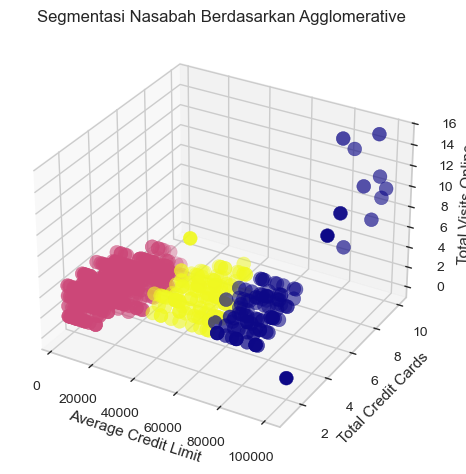

Silhoutee Score K-Means: 0.705


In [16]:
import seaborn as sns 
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], 
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah Berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhoutee Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))


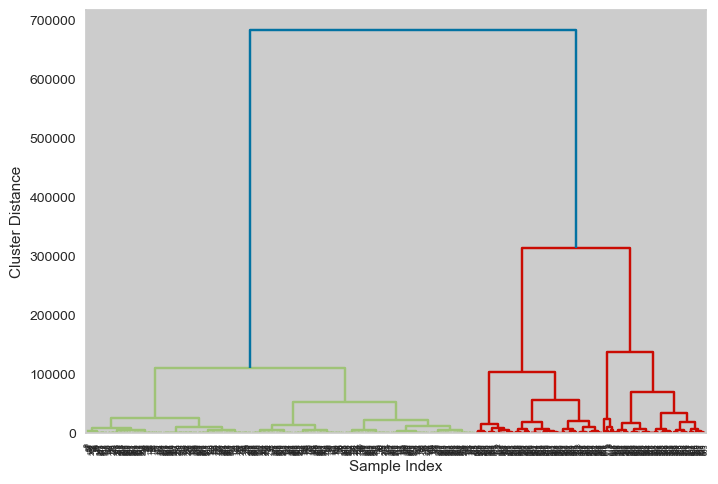

In [17]:

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

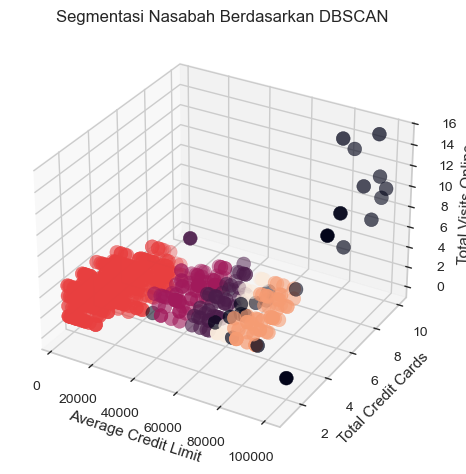

Silhoutee Score K-Means: 0.657


In [19]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], 
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah Berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhoutee Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [20]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)
    
with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)
                
print("Model Berhasil disimpan")                

Model Berhasil disimpan
